In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
import pandas as pd
# csv = pd.read_csv("/content/drive/My Drive/IMDB Dataset.csv")
# vocab = csv["review"].values
# nltk.download('punkt')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# dữ liệu đầu vào 
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
      ['this', 'is', 'the', 'second', 'sentence', 'for', 'word2vec'],
			['it', 'is', 'the', 'third', 'sentence', 'for', 'word2vec'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['the', 'final', 'sentence']]

# train model
model = Word2Vec(sentences,size = 100, min_count=1,sg = 1) 

# summarize the loaded model
print("Model summary:",model)

# summarize vocabulary
words = list(model.wv.vocab) # 
print("List words in vocabulary:",words)

# access vector for one word
print("Vector for word 'sentence':",model['sentence'])

# save model
model.save('model.bin')

# load model
new_model = Word2Vec.load('model.bin')

Model summary: Word2Vec(vocab=15, size=100, alpha=0.025)
List words in vocabulary: ['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'it', 'third', 'yet', 'another', 'one', 'more', 'final']
Vector for word 'sentence': [-3.9263540e-03  9.8158245e-04 -4.3400195e-03 -3.7862891e-03
 -4.4064703e-03  3.0587218e-03  2.3430544e-03  4.1764090e-03
  2.3138842e-03 -2.9604482e-03 -4.8101097e-03  2.6583916e-03
 -2.4510347e-03  3.4271986e-03 -3.1066742e-03 -2.9012875e-03
 -2.1899526e-03 -3.1067813e-03  3.3531208e-03 -4.7696549e-03
 -2.3461101e-03  8.5888169e-04  8.8542385e-04 -2.6131156e-03
  3.1454845e-03  2.2050345e-03  1.6837126e-04 -2.7746256e-03
  2.2980166e-03 -3.9524306e-03  4.0755668e-03  3.9051911e-03
 -2.6560372e-03  3.3071332e-04 -3.9705737e-03  4.1565592e-03
 -1.2755182e-03  9.6070289e-04 -2.0113226e-03 -2.7136658e-03
 -4.9639522e-04 -6.0666254e-04  1.2179464e-03  2.5426161e-03
 -3.4442018e-03 -3.6046628e-03 -4.0561198e-03 -2.5898442e-03
 -4.1006482e-03 -3.5896073e-

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
#Get all vectors of vocabulary
X = model[model.wv.vocab]
print("X shape",X.shape)

X shape (15, 100)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [ ]:
# Sử dụng PCA để giảm chiều để vẽ lên đucợ biểu đồ
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
result = pca.fit_transform(X)

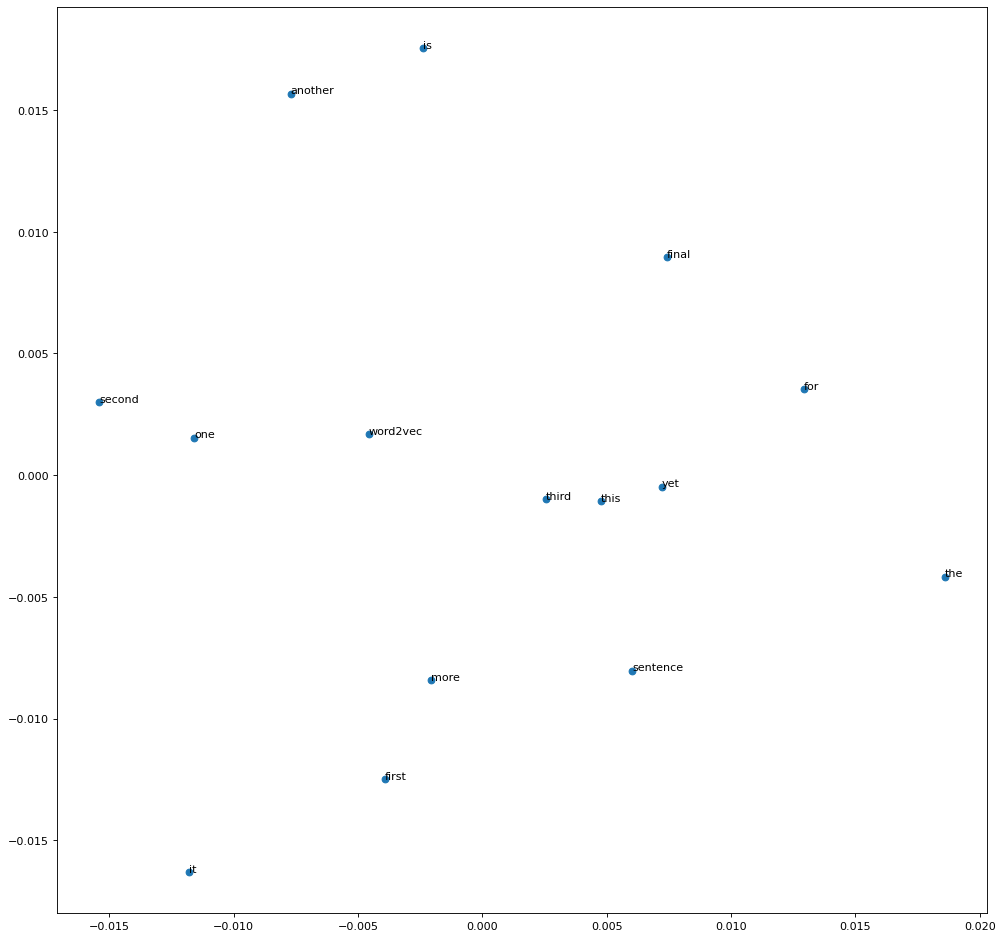

In [ ]:
from matplotlib import pyplot
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()